# Assignment 2

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%pip install gradio

Active code page: 1252
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pycaret

Active code page: 1252
Note: you may need to restart the kernel to use updated packages.


### Getting data

In [4]:
test = pd.read_csv('C:/Users/Tommy/notebook/test.csv')
train = pd.read_csv('C:/Users/Tommy/notebook/train.csv')

### Exploring data

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### preparing data

In [7]:
from pycaret.regression import*

setup() sometimes take long time to complete (30min+)

Used setup for some simple imputation of missing values and one hot encoding of values. We could have tinkered with the setup parameter a bit more but it took too long to run.

In [8]:
s = setup(train, target = "SalePrice",use_gpu=True)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:11:35
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Id,ID Column
MSSubClass,Categorical
MSZoning,Categorical
LotFrontage,Numeric
LotArea,Numeric
...,...
MoSold,Categorical
YrSold,Categorical
SaleType,Categorical
SaleCondition,Categorical


### Exploring models

Here we compared the models and sorted it after RMSE and chose the top 3 models for ensembling

In [ ]:
best = compare_models(n_select=3,sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,18037.7913,953433878.5856,29846.8463,0.8417,0.1514,0.1068,0.7210
gbr,Gradient Boosting Regressor,17829.6306,995768886.9400,30077.3078,0.8333,0.1448,0.1044,0.6420
rf,Random Forest Regressor,18814.8656,1081193356.1144,31658.5247,0.8215,0.1603,0.1127,0.7740
et,Extra Trees Regressor,20841.4876,1268034243.0633,34638.8411,0.7777,0.1743,0.1225,0.8220
ridge,Ridge Regression,19976.6505,1454732202.4231,35328.9157,0.7542,0.2023,0.1196,0.1100
en,Elastic Net,21522.6370,1588522667.8054,37133.0310,0.7364,0.1692,0.1252,0.1500
ada,AdaBoost Regressor,25751.5525,1492212968.2574,37884.9174,0.7432,0.2120,0.1684,0.3740
br,Bayesian Ridge,25418.3653,1964739861.9802,41922.0167,0.6684,0.2008,0.1478,0.2110
lr,Linear Regression,23600.7564,2055835641.7152,42371.8319,0.6456,0.2255,0.1468,0.1010
omp,Orthogonal Matching Pursuit,21038.4878,2886616246.7224,42808.0360,0.4883,0.1658,0.1225,0.0140


### fine tuning models and stacking

Fine tuning the top 3 models

In [ ]:
tuned_1 = tune_model(best[0], optimize='RMSE',fold=10,n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21130.3606,1250150482.7564,35357.4671,0.7645,0.1581,0.1164
1,17059.5471,624364334.8120,24987.2835,0.8875,0.1398,0.0992
2,20642.9652,1662769295.5664,40777.0683,0.7436,0.1761,0.1215
3,15652.6406,516049629.6730,22716.7258,0.8573,0.1498,0.1091
4,24642.1139,2492983018.5457,49929.7809,0.7733,0.2019,0.1331
5,15335.8114,535613050.7235,23143.3155,0.8963,0.1241,0.0926
6,17222.8981,872739552.2330,29542.1657,0.8581,0.1575,0.1066
7,17663.7451,693011925.8084,26325.1197,0.8569,0.1519,0.1107
8,13638.4996,470228041.9288,21684.7421,0.8807,0.1238,0.0891


In [ ]:
tuned_2 = tune_model(best[1], fold=10, n_iter=100, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18687.3534,1530371756.6283,39119.9662,0.7118,0.1435,0.0971
1,16665.5308,547347483.8725,23395.4586,0.9014,0.1313,0.0963
2,18763.9465,1566317672.5163,39576.7315,0.7585,0.1750,0.1122
3,13511.5583,345084201.4919,18576.4421,0.9046,0.1273,0.0930
4,21345.3960,1809960021.4473,42543.6249,0.8354,0.1701,0.1130
5,15743.4269,536215016.9032,23156.3170,0.8962,0.1163,0.0890
6,16670.1173,784005034.2499,28000.0899,0.8725,0.1300,0.0971
7,15772.2109,519462986.6044,22791.7307,0.8927,0.1314,0.0975
8,12736.6304,402745097.2223,20068.5101,0.8979,0.1255,0.0849


In [ ]:
tuned_3 = tune_model(best[2], fold=10, n_iter=100, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21124.5993,1797114392.4613,42392.3860,0.6615,0.1692,0.1172
1,18200.4993,745494478.4189,27303.7448,0.8657,0.1461,0.1029
2,21350.3373,1493793934.3620,38649.6305,0.7697,0.1829,0.1291
3,14931.3152,428976482.7377,20711.7475,0.8814,0.1438,0.1050
4,24419.3799,2433087633.5031,49326.3381,0.7788,0.2067,0.1340
5,15496.2996,522681830.2701,22862.2359,0.8988,0.1310,0.0975
6,17732.0775,851029498.4320,29172.4099,0.8616,0.1683,0.1146
7,18695.7703,752425775.7168,27430.3805,0.8446,0.1556,0.1158
8,17010.9881,648401885.9428,25463.7367,0.8356,0.1442,0.1083


### Evalute best stacking model

Finding the best way to stack our best models

In [ ]:
best_models = [tuned_1, tuned_2, tuned_3]

In [ ]:
voting = blend_models(best_models, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19427.2653,1438865467.3805,37932.3802,0.7290,0.1513,0.1050
1,15262.1652,547474897.7209,23398.1815,0.9014,0.1314,0.0898
2,19126.6126,1513954001.2019,38909.5618,0.7665,0.1738,0.1144
3,13898.0482,384908541.8226,19619.0862,0.8936,0.1350,0.0976
4,22523.6705,2146306458.7541,46328.2469,0.8048,0.1880,0.1216
5,14568.0551,472302931.6311,21732.5316,0.9085,0.1142,0.0866
6,16297.7364,761181290.1264,27589.5141,0.8762,0.1459,0.1005
7,16341.3304,592882928.6337,24349.1874,0.8775,0.1402,0.1018
8,13032.2799,434278342.3630,20839.3460,0.8899,0.1226,0.0862


In [ ]:
blender = stack_models(estimator_list=best_models, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23222.0687,3247453223.0025,56986.4302,0.3884,0.2013,0.1337
1,32502.2763,4805890722.9169,69324.5319,0.1341,0.3913,0.1657
2,19339969.4468,15108390273590912.0000,122916192.0724,-2329768.6382,1.6468,240.6100
3,17845.6259,552698709.7170,23509.5451,0.8472,0.1562,0.1215
4,20895.2089,1185506368.5102,34431.1831,0.8922,0.3465,0.1271
5,17247.3642,758600071.7669,27542.6954,0.8531,0.1370,0.1051
6,16656.8889,474973505.3023,21793.8869,0.9228,0.1957,0.1120
7,19814.2805,797861852.3565,28246.4485,0.8352,0.1854,0.1287
8,16809.9302,787053593.9127,28054.4755,0.8004,0.2068,0.1102


In [ ]:
model = voting
model

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(bagging_fraction=0.8, bagging_freq=0,
                                           boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0, device='gpu',
                                           feature_fraction=0.4,
                                           importance_type='split',
                                           learning_rate=0.05, max_depth=-1,
                                           min_child_samples=31,
                                           min_child_weight=0.001,
                                           min_split_gain=0.6, n_estimators=70,
                                           n_jobs=-1, num_leaves=256,
                                           object...
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha

### feature importance

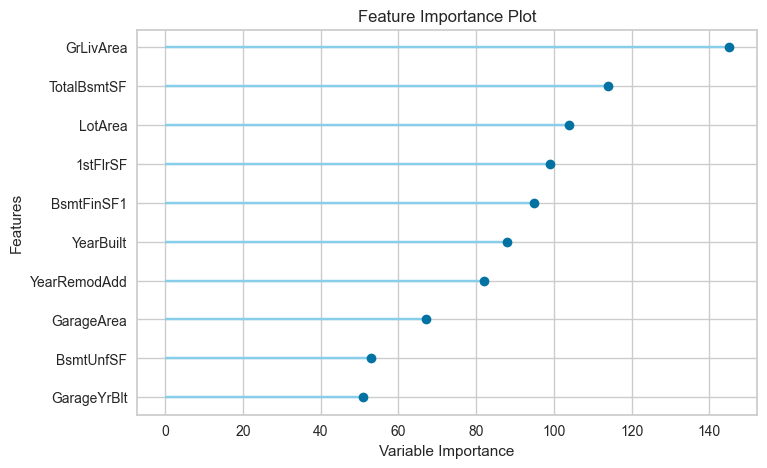

In [ ]:
plot_model(best_models[0], 'feature')

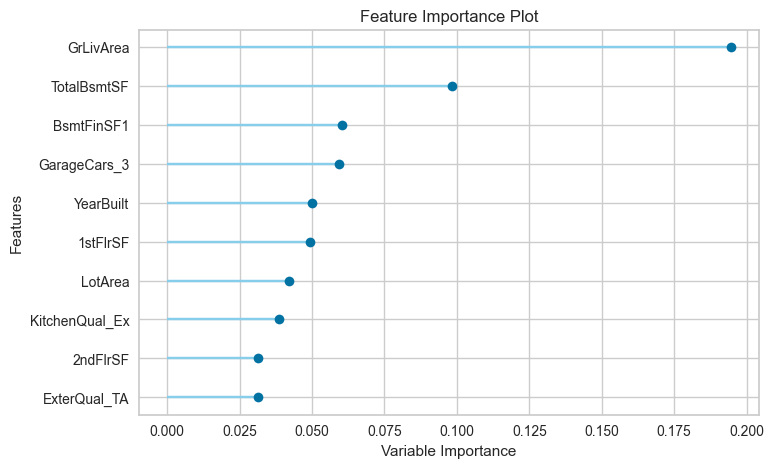

In [ ]:
plot_model(best_models[1], 'feature')

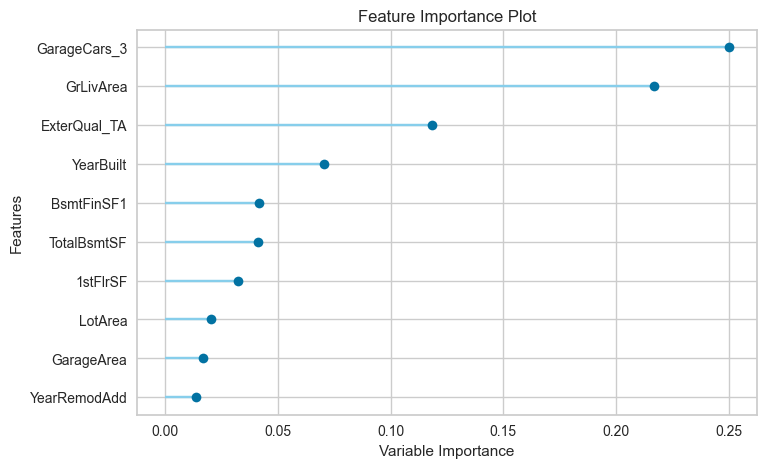

In [ ]:
plot_model(best_models[2], 'feature')

### Evaluate and validate model (Kaggle)

In [ ]:
pred = predict_model(model, data = test)

In [ ]:
pred.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,127858.325047
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,163861.897871
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,190066.050847
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189850.713969
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,186197.186524


In [ ]:
final_model = finalize_model(model)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 

In [ ]:
import pickle

Exporting our model

In [ ]:
pickle.dump(final_model, open('saved_model.pkl', 'wb'))

Proof of concept since we had a lot of labels and it was time consuming to construct variable for all of them

In [ ]:
create_app(final_model)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x2403af342c8>, 'http://127.0.0.1:7860/', None)